In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

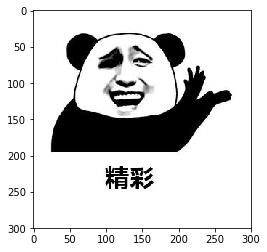

In [2]:
img = cv2.imread('./pandaHead.jpg', 0)
plt.imshow(img, cmap='gray')

In [3]:
convolutionCore = np.ones((8, 4))

In [4]:
def Convolution(img, convolutionCore):
    convolutionCoreShape = convolutionCore.shape
    while img.shape[0] % convolutionCoreShape[0]:
        img = np.concatenate((img, img[-1, np.newaxis, :]), axis=0)
    while img.shape[1] % convolutionCoreShape[1]:
        img = np.concatenate((img, img[:, -1, np.newaxis]), axis=1)
    convolutionCore = np.sum(np.sum(convolutionCore))
    imgShape = img.shape
    newImgSize = (int(imgShape[0]/convolutionCoreShape[0]), int(imgShape[1]//convolutionCoreShape[1]))
    newImg = np.zeros(newImgSize)
    for i in range(newImgSize[0]):
        for j in range(newImgSize[1]):
            newImg[i, j] = np.sum(np.sum(
                img[i*convolutionCoreShape[0]:(i+1)*convolutionCoreShape[0], 
                    j*convolutionCoreShape[1]:(j+1)*convolutionCoreShape[1]] * convolutionCore))
    scale = np.max(np.max(newImg)) / 255
    newImg = newImg / scale
    newImg = np.ceil(newImg)
    return newImg

In [5]:
newImg = Convolution(img, convolutionCore)
newImg.shape

(38, 75)

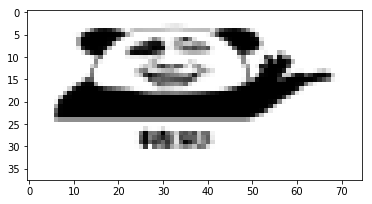

In [6]:
plt.imshow(newImg, cmap='gray')

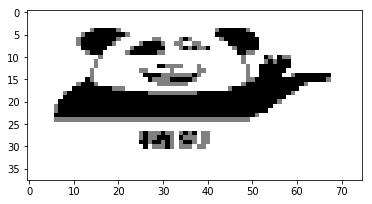

In [7]:
grayLevel = [85, 170, 256]
grayLevelImg = np.zeros(newImg.shape)
for i in range(newImg.shape[0]):
    for j in range(newImg.shape[1]):
        l = 0
        while newImg[i, j] > grayLevel[l]:
            l += 1
        grayLevelImg[i, j] = l
plt.imshow(grayLevelImg, cmap='gray')

In [8]:
charMap = ['@', 'o', ' ']
charImg = np.chararray(newImg.shape)
for i in range(newImg.shape[0]):
    for j in range(newImg.shape[1]):
        charImg[i, j] = charMap[int(grayLevelImg[i, j])]
charImg = charImg.decode()
with open('char.txt', 'w') as f:
    for i in range(newImg.shape[0]):
        for j in range(newImg.shape[1]):
            f.write(charImg[i, j])
        f.write('\n')